In [296]:
# Load data
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('q2.csv', header=None)
data.columns = ['A', 'B', 'C']
data.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [297]:
# check if there are NaN in data
data.isnull().sum(axis=0)

A    0
B    0
C    0
dtype: int64

In [298]:
data.describe()

,A,B,C
count,300.000000,300.000000,300.000000
mean,2.317009,2.013115,-41.564919
std,5.695248,2.998680,581.251021
min,-8.860000,-2.890000,-10000.000000
25%,-1.940000,-0.606250,-23.375000
50%,0.468500,1.935000,-3.090000
75%,7.042500,4.697500,16.300000
max,20.600000,7.000000,202.000000


In [299]:
def hist_it(feat):
    """ plot distribution of each feature """
    plt.figure(figsize=(16,4))
    feat.hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.8)
    feat.hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.5)
    plt.xlabel("value")
    plt.ylabel("frequency")

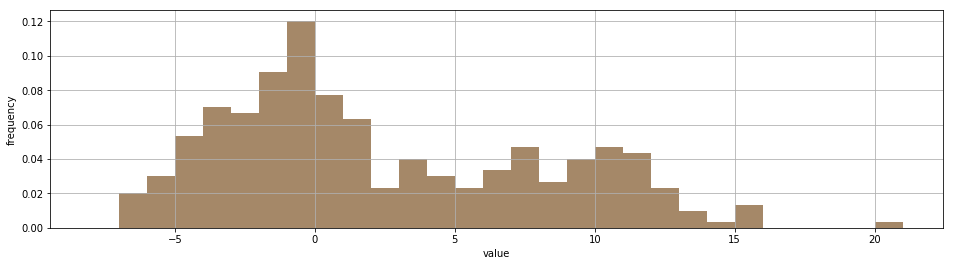

In [300]:
hist_it(data['A'])

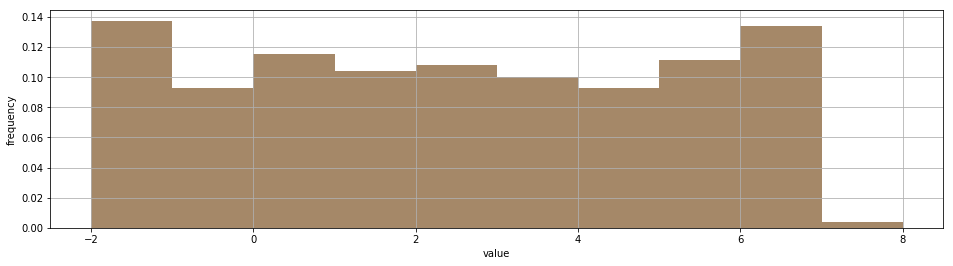

In [301]:
hist_it(data['B'])

(0, 0.01)

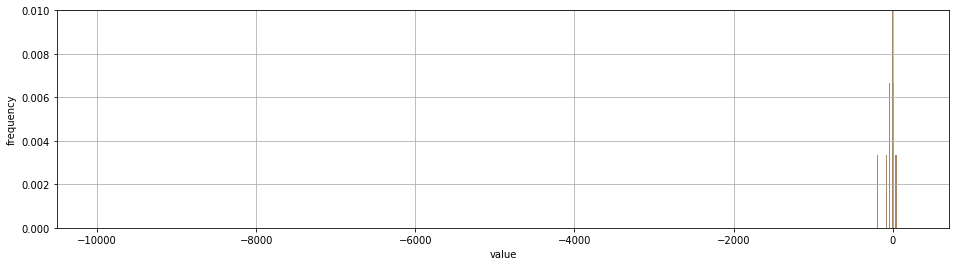

In [302]:
hist_it(data['C'])
plt.ylim(0,0.01)

From the distribution above, we may find the outliers in the column C.

In [303]:
data[data.C<=-1000]

,A,B,C
200,10.1,-2.24,-10000.0


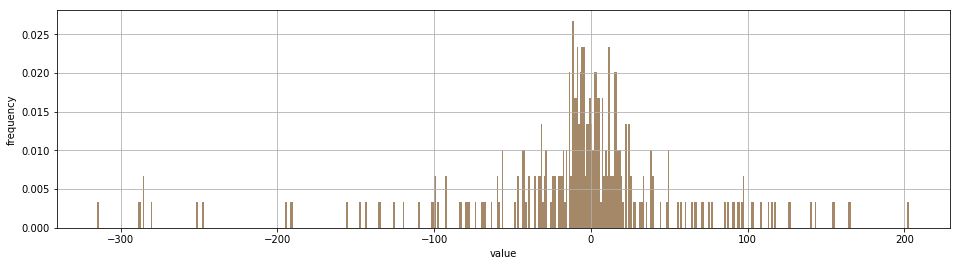

In [304]:
cleaned_data = data[data.C>-1000]
hist_it(cleaned_data['C'])

In [305]:
def index_scatter_plot(feature):
    """ scatter plot by index """
    plt.plot(feature, '.')
    plt.xlabel("index")
    plt.ylabel("value")

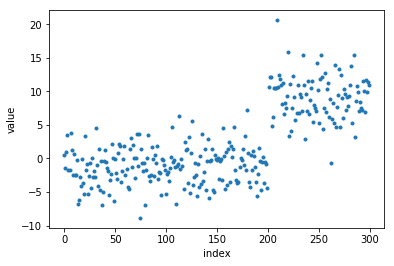

In [306]:
index_scatter_plot(cleaned_data.A)

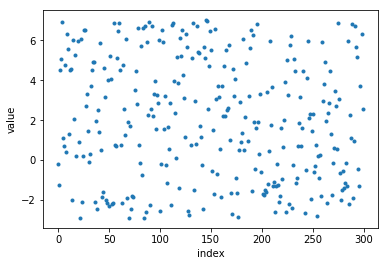

In [307]:
index_scatter_plot(cleaned_data.B)

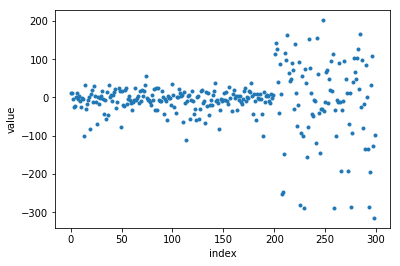

In [308]:
index_scatter_plot(cleaned_data.C)

From the scatter plots, we may see that there is a big difference in A and C before and after the index near 200.

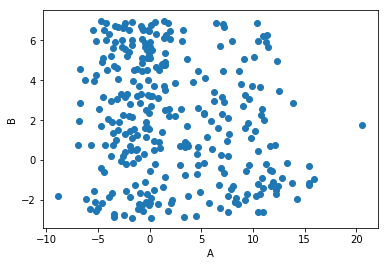

In [309]:
# Explore feature relationship
plt.scatter(cleaned_data.A, cleaned_data.B)
_ = plt.xlabel('A')
_ = plt.ylabel('B')

We may define the data point where A superior than 20 as a outlier according to this plot.

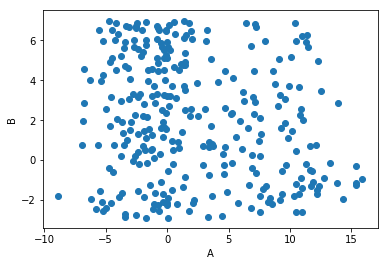

In [310]:
cleaned_data = cleaned_data[cleaned_data.A<20]
plt.scatter(cleaned_data.A, cleaned_data.B)
_ = plt.xlabel('A')
_ = plt.ylabel('B')

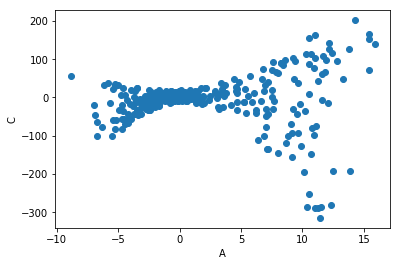

In [311]:
plt.scatter(cleaned_data.A, cleaned_data.C)
_ = plt.xlabel('A')
_ = plt.ylabel('C')

From this plot, we may see that A is correlated to the variance of C.  
It seems that whether A is negative or positive doesn't influence C.  
So later we will create two more features with the absolute of A and the square of A.

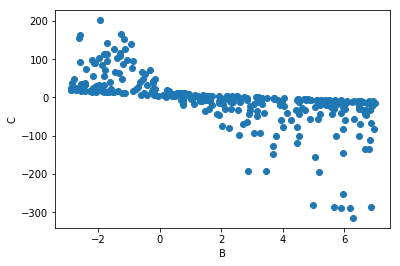

In [313]:
plt.scatter(cleaned_data.B, cleaned_data.C)
_ = plt.xlabel('B')
_ = plt.ylabel('C')

From this plot, we may see the significant negative linear correlation between B and C. The bias is correlated with B, too.

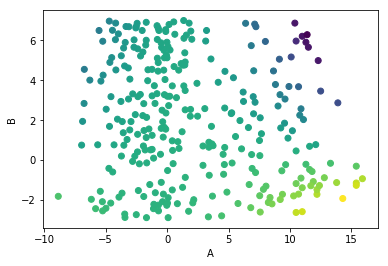

In [314]:
plt.scatter(cleaned_data.A, cleaned_data.B, c=cleaned_data.C)
_ = plt.xlabel('A')
_ = plt.ylabel('B')

In [315]:
cleaned_data.corr()

,A,B,C
A,1.000000,-0.189354,0.048752
B,-0.189354,1.000000,-0.631745
C,0.048752,-0.631745,1.000000


In [316]:
cleaned_data = cleaned_data.assign(A_square = cleaned_data.A **2)
cleaned_data = cleaned_data.assign(A_absolut = abs(cleaned_data.A))
cleaned_data.head()

,A,B,C,A_square,A_absolut
0,0.490,-0.18,11.50,0.240100,0.490
1,-1.410,-1.23,11.80,1.988100,1.410
2,0.943,4.51,-3.24,0.889249,0.943
3,3.570,5.07,-23.90,12.744900,3.570
4,-1.700,6.91,-22.10,2.890000,1.700


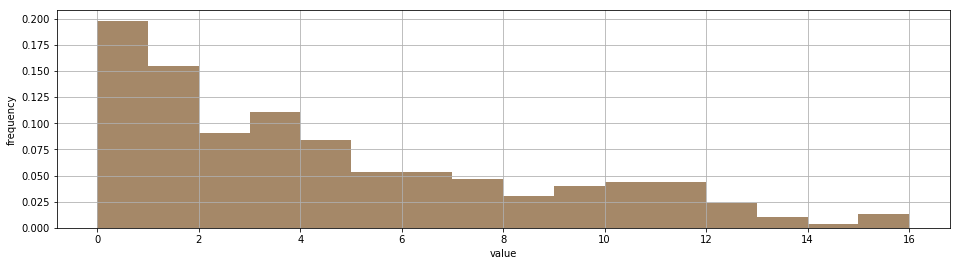

In [317]:
hist_it(cleaned_data['A_absolut'])

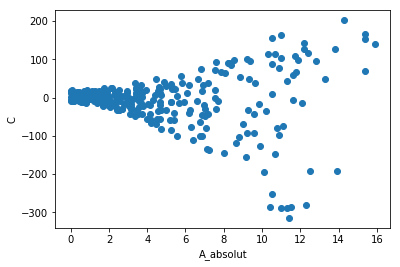

In [318]:
plt.scatter(cleaned_data.A_absolut, cleaned_data.C)
_ = plt.xlabel('A_absolut')
_ = plt.ylabel('C')

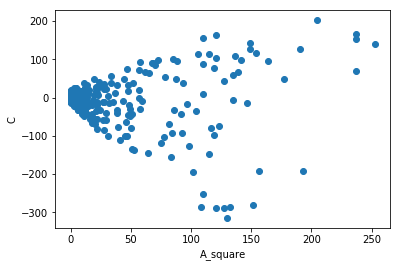

In [319]:
plt.scatter(cleaned_data.A_square, cleaned_data.C)
_ = plt.xlabel('A_square')
_ = plt.ylabel('C')

The two plots above look like amplifier.  
Bigger A_square/A_absolut leads to larger scope of C.   

Considering the linear relationship between `B` and `C` we found before,   
we may assume the relation between C and (A, B):    
`C = f(A)*B + bias.`

Let's create more features to simulate `f(A)*B`.

In [320]:
cleaned_data['A_absolut_times_B'] = cleaned_data['A_absolut']*cleaned_data['B'] # abs(A)*B
cleaned_data['A_square_times_B'] = cleaned_data['A_square']*cleaned_data['B'] # (A^2)*B
cleaned_data.head()

,A,B,C,A_square,A_absolut,A_absolut_times_B,A_square_times_B
0,0.490,-0.18,11.50,0.240100,0.490,-0.08820,-0.043218
1,-1.410,-1.23,11.80,1.988100,1.410,-1.73430,-2.445363
2,0.943,4.51,-3.24,0.889249,0.943,4.25293,4.010513
3,3.570,5.07,-23.90,12.744900,3.570,18.09990,64.616643
4,-1.700,6.91,-22.10,2.890000,1.700,11.74700,19.969900


In [321]:
cleaned_data.corr()

,A,B,C,A_square,A_absolut,A_absolut_times_B,A_square_times_B
A,1.000000,-0.189354,0.048752,0.805477,0.763023,0.062057,0.144825
B,-0.189354,1.000000,-0.631745,-0.221077,-0.224263,0.689561,0.506809
C,0.048752,-0.631745,1.000000,0.042194,-0.020959,-0.960554,-0.975718
A_square,0.805477,-0.221077,0.042194,1.000000,0.952924,0.066433,0.123015
A_absolut,0.763023,-0.224263,-0.020959,0.952924,1.000000,0.138226,0.183867
A_absolut_times_B,0.062057,0.689561,-0.960554,0.066433,0.138226,1.000000,0.944572
A_square_times_B,0.144825,0.506809,-0.975718,0.123015,0.183867,0.944572,1.000000


While checking the correlation matrix, I found -0.960554 and -0.975718.   
Strong linear correlation between `C, A_absolut_times_B`  
and `C, A_square_times_B`.           
Let's plot them!

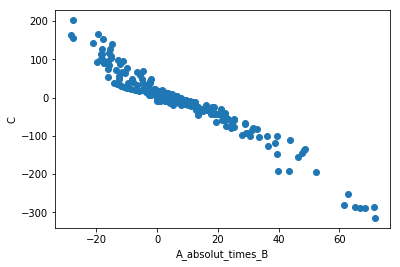

In [322]:
plt.scatter(cleaned_data.A_absolut_times_B, cleaned_data.C)
_ = plt.xlabel('A_absolut_times_B')
_ = plt.ylabel('C')

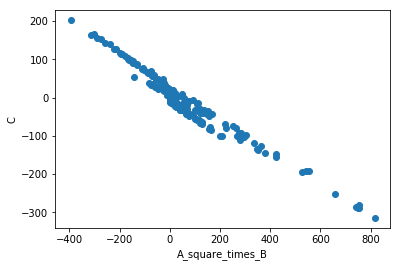

In [323]:
scatter_plot = plt.scatter(cleaned_data.A_square_times_B, cleaned_data.C)
_ = plt.xlabel('A_square_times_B')
_ = plt.ylabel('C')

Amazing!   
It shows the linear relation between `(A^2)*B` and `C`.  
We may assume the relation between C and (A, B):    
`C = k*(A^2)*B + bias.`  
Now we need to calculate the slope and handle the bias.  

Let's scaling `(A^2)*B`, `B` and `C` before calculating the regression parameters.

In [324]:
min_val = cleaned_data['A_square_times_B'].min()
max_val = cleaned_data['A_square_times_B'].max()

cleaned_data['scaled_A_square_times_B'] = (cleaned_data['A_square_times_B']-min_val)/(max_val-min_val)

min_B = cleaned_data['B'].min()
max_B = cleaned_data['B'].max()
cleaned_data['scaled_B'] = (cleaned_data['B']-min_B)/(max_B-min_B)

min_C = cleaned_data['C'].min()
max_C = cleaned_data['C'].max()
cleaned_data['scaled_C'] = (cleaned_data['C']-min_C)/(max_C-min_C)

cleaned_data.head()

,A,B,C,A_square,A_absolut,A_absolut_times_B,A_square_times_B,scaled_A_square_times_B,scaled_B,scaled_C
0,0.490,-0.18,11.50,0.240100,0.490,-0.08820,-0.043218,0.325565,0.274014,0.631528
1,-1.410,-1.23,11.80,1.988100,1.410,-1.73430,-2.445363,0.323584,0.167846,0.632108
2,0.943,4.51,-3.24,0.889249,0.943,4.25293,4.010513,0.328910,0.748231,0.603017
3,3.570,5.07,-23.90,12.744900,3.570,18.09990,64.616643,0.378910,0.804853,0.563056
4,-1.700,6.91,-22.10,2.890000,1.700,11.74700,19.969900,0.342076,0.990900,0.566538


In [325]:
import numpy as np

theta = np.zeros(2) # [slope, bias]
X = np.ones(shape=(cleaned_data.shape[0], 2))
X[:, 1] = cleaned_data.scaled_A_square_times_B

predictions = X @ theta

In [326]:
def cost(theta, X, y):
    """ Calculate the mean squared error cost function """
    predictions = X @ theta
    squared_errors = np.square(predictions - y)
    return np.sum(squared_errors) / (2 * len(y))

print('The initial cost is:', cost(theta, X, cleaned_data.scaled_C))

The initial cost is: 0.1860859480373176


In [327]:
def gradient_descent(X, y, alpha, num_iters):
    num_features = X.shape[1]               
    theta = np.zeros(num_features)          # initialize model parameters
    for n in range(num_iters):
        predictions = X @ theta             # compute predictions based on the current hypothesis
        errors = predictions - y
        gradient = X.transpose() @ errors
        theta -= alpha * gradient / len(y)  # update model parameters
    return theta    

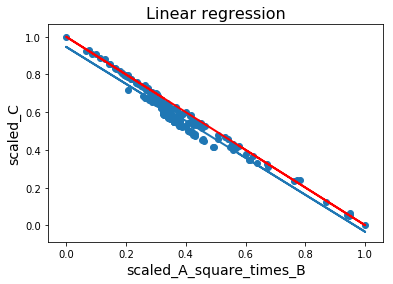

In [328]:
fig, ax = plt.subplots()
ax.scatter(cleaned_data.scaled_A_square_times_B, cleaned_data.scaled_C)
plt.title("Linear regression", fontsize=16)
plt.xlabel("scaled_A_square_times_B", fontsize=14)
plt.ylabel("scaled_C", fontsize=14)

theta = gradient_descent(X, cleaned_data.scaled_C, 0.1, 10000)   # run GD for 600 iterations with learning rate = 0.02
predictions = X @ theta                     # predictions made by the optimized model
ax.plot(X[:, 1], predictions, linewidth=2)  # plot the hypothesis on top of the training data

# visually it looks like a line with slope -1 and bias 1, let's try to plot this line on the same graph
theta2 = [1, -1] 
predictions2 = X @ theta2
ax.plot(X[:, 1], predictions2, linewidth=2, c='red') # plot another hypothesis
plt.show()

In [329]:
theta

array([ 0.94624606, -0.98084723])

I want to check the different loss sum between calculated theta and the visualized theta.  
It looks so true my visualized theta!

In [330]:
print("sum of errors for calculated theta is: ", np.square(predictions - cleaned_data.scaled_C).sum())
print("sum of errors for visualised theta is: ", np.square(predictions2 - cleaned_data.scaled_C).sum())

sum of errors for calculated theta is:  0.2617219796115029
sum of errors for visualised theta is:  0.9189796281042063


OK. I trust the calculated one.  
Then we have `scaled_C = -0.98084723*scaled_A_square_times_B + 0.94624606`  
So that `C_hat = -0.4183583194931895*A^2*B+9.0975340063967`

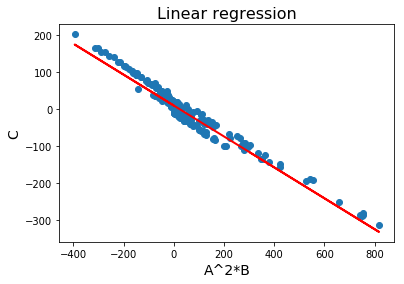

In [331]:
# plot of data points and the regression model that fits the data points
fig, ax = plt.subplots()
ax.scatter(cleaned_data.A_square_times_B, cleaned_data.C)
plt.title("Linear regression", fontsize=16)
plt.xlabel("A^2*B", fontsize=14)
plt.ylabel("C", fontsize=14)

X = np.ones(shape=(cleaned_data.shape[0], 2))
X[:, 1] = cleaned_data.A_square_times_B
theta = [9.0975340063967, -0.4183583194931895]
predictions = X @ theta                     # predictions made by the optimized model
ax.plot(X[:, 1], predictions, linewidth=2, c='red')  # plot the hypothesis on top of the training data

plt.show()